# Calculation of Full Width Half Maximum of Data

## Half Width of Gravity Anomaly

In [9]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [10]:
x,anomaly = np.loadtxt('Gravity/grav_profile_array.txt',unpack=True)

In [11]:
def find_FWHM(x,anomaly,c,m,FWHM,ctr,height,magnetic=True):
    """ 
    x : list
        a list of input x values
    anomaly : list
        a list of input y values
    c : float
        a guess for the y intercept of the background counts
    m : float
        a guess for the background gradient
    ctr: float
        a guess for the centre of the peak (x coordinate)
    height : float
        a guess for the height of the peak above the background
    magnetic : boolean
        if true, is a magnetic anomaly
        if false, is a gravitational anomaly
    """
    n = len(x) # number of data points

    def f(x,m,c,FWHM,ctr,height):
        sigma = FWHM/2.3548
        return m*x+c+height*np.exp(-0.5*(x-ctr)**2/sigma**2)
        
    popt, pcov = curve_fit(f,x,anomaly,p0=[m,c,FWHM,ctr,height])

    # Fitted parameters
    print("FWHM =",popt[2],"+/-",np.sqrt(pcov[2][2]))

    yfit = f(x,*popt) # fitted y values
    resid = anomaly - yfit # residuals
    ssr = np.sum(resid**2)

    R2 = 1-(np.var(resid)/np.var(anomaly))

    n_par = len(popt) # numer of fitted parameters
    n_df = n - n_par # degrees of freedom
    print("SSR =",ssr," n_df = ",n_df," R^2 = ",R2)

    fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,sharex=True)
    ax1.plot(x/1e3,yfit,'-',label='fit')
    ax1.scatter(x/1e3,anomaly,marker='x',label='data',alpha=0.5,s=0.5,c='r')
    if magnetic is True:
        ax1.set_ylabel('Magnetic Anomaly [nT]')
    else:
        ax1.set_ylabel('Bouguer Anomaly [mGal]')
    ax1.legend()
    ax2.scatter(x/1e3,resid,marker='x',s=0.3)
    ax2.set_xlabel('Distance [m]')
    if magnetic is True:
        ax2.set_ylabel("Residuals [nT]")
    else:
        ax2.set_ylabel("Residuals [mGal]")
    ax2.set_xlabel('Distance [km]')
    xmin = np.min(x/1e3)
    xmax = np.max(x/1e3)
    ax1.set_xlim(xmin,xmax)
    ax1.grid()
    ax2.grid()
    ax2.hlines(y=0,xmin=xmin,xmax=xmax,color='k')
    fig.tight_layout()
    return fig

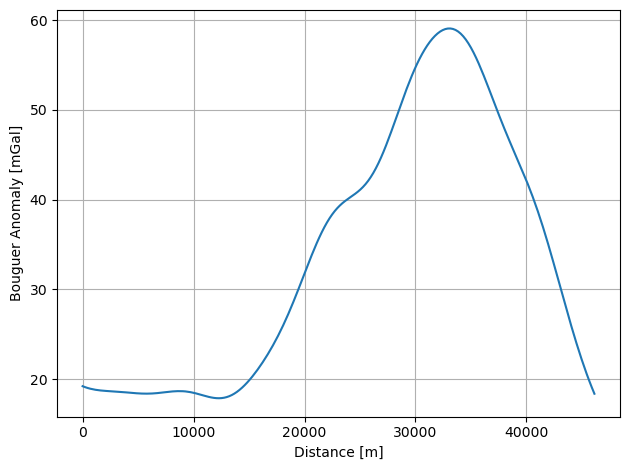

In [4]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Bouguer Anomaly [mGal]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $18 \mathrm{mGal}$
- gradient of the background: $0 \mathrm{mGal}$
- Half width: $10 \times 10^{3} \mathrm{m}$
- Centre of the peak: $33 \times 10^{3} \mathrm{m}$
- Height of the peak: $40 \mathrm{mGal}$

FWHM = 23244.7574787999 +/- 629.9987069104399
SSR = 416.86753320416534  n_df =  195  R^2 =  0.9900724364791175


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_54971/3994380934.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


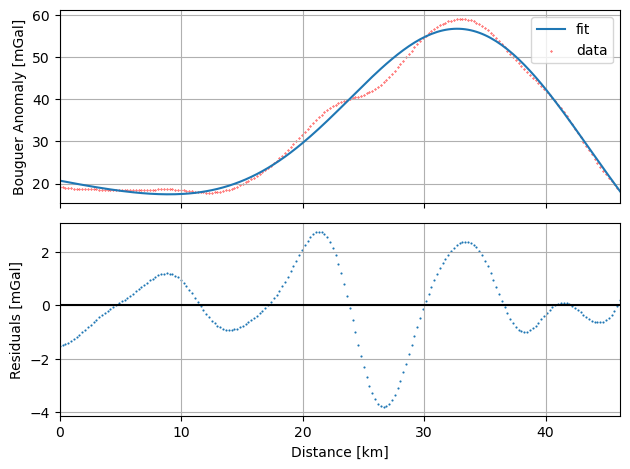

In [5]:
fig = find_FWHM(x,anomaly,18,0,10e3,33e3,40,False)
fig.show()

This shows the half width of the gravity anomaly is $2.44 \times 10^4 \pm 860 \mathrm{m}$.

## Half Width of Magnetic Anomaly

In [4]:
x,anomaly = np.loadtxt('Aeromagnetic/rtp_profile_array.txt',unpack=True)

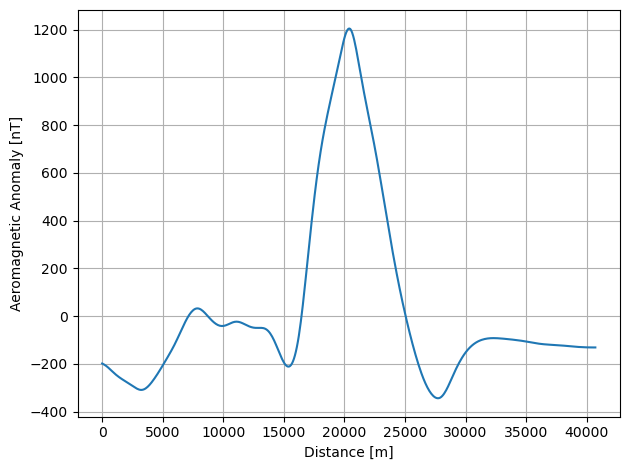

In [7]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Aeromagnetic Anomaly [nT]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $-200 \mathrm{nT}$
- gradient of the background: $0 \mathrm{nT}$
- Half width: $3.3 \times 10^{3} \mathrm{m}$
- Centre of the peak: $20 \times 10^{3} \mathrm{m}$
- Height of the peak: $1400 \mathrm{nT}$

FWHM = 5095.775255746962 +/- 77.86080704085533
SSR = 4325797.856007837  n_df =  495  R^2 =  0.9408246849786399


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_54971/802398503.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


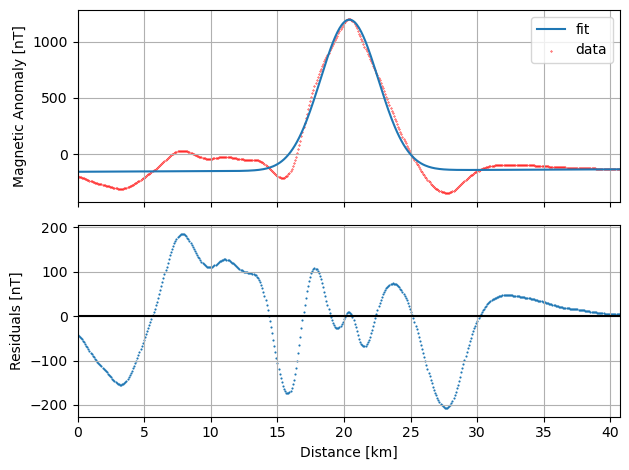

In [8]:
fig = find_FWHM(x,anomaly,-200,0,3.3e3,20e3,1400)
fig.show()

This shows the half width of the aeromagnetic anomaly is $5.1 \times 10^3 \pm 78 \mathrm{m}$.

# Half Width of Forward Modelled Responses

## Half Width of Extended Gravity Anomaly (Model 1)

In [9]:
x,anomaly = np.loadtxt('Modelling/Gravity/GravModel1_extended.txt',unpack=True,usecols=[0,1])

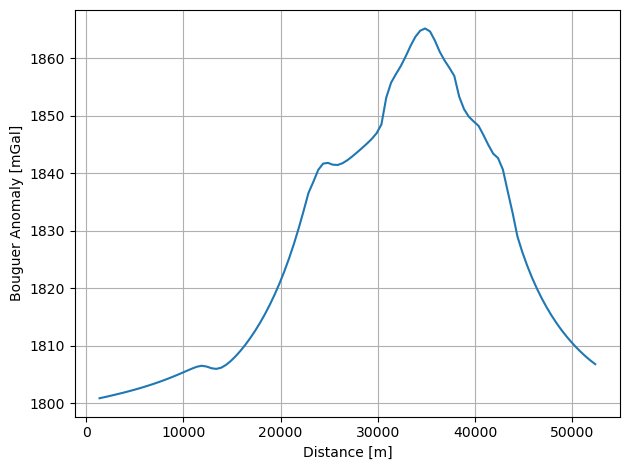

In [10]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Bouguer Anomaly [mGal]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $1.8 \times 10^3 \mathrm{mGal}$
- gradient of the background: $0 \mathrm{mGal}$
- Half width: $10 \times 10^{3} \mathrm{m}$
- Centre of the peak: $35 \times 10^{3} \mathrm{m}$
- Height of the peak: $60 \mathrm{mGal}$

FWHM = 23228.078187240655 +/- 752.5037685373147
SSR = 845.2185187391713  n_df =  98  R^2 =  0.9812589053652847


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_54971/279314469.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


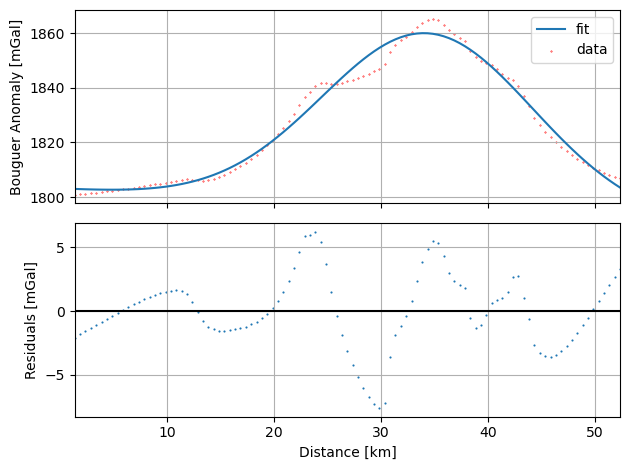

In [11]:
fig = find_FWHM(x,anomaly,1.8e3,0,10e3,35e3,60,False)
fig.show()

This shows the half width of the gravity anomaly is $2.32 \times 10^4 \pm 752 \mathrm{m}$.

## Half Width of Extended Gravity Anomaly (Model 2)

In [13]:
x,anomaly = np.loadtxt('Modelling/Gravity/GravModel2_ext.txt',unpack=True,usecols=[0,1])

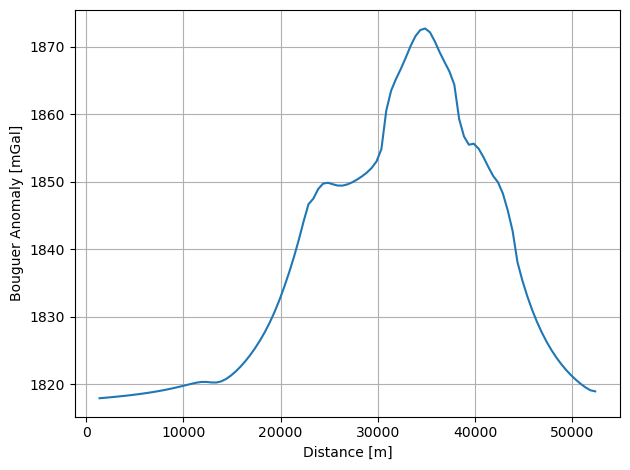

In [14]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Bouguer Anomaly [mGal]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $1.83 \times 10^3 \mathrm{mGal}$
- gradient of the background: $0 \mathrm{mGal}$
- Half width: $10 \times 10^{3} \mathrm{m}$
- Centre of the peak: $35 \times 10^{3} \mathrm{m}$
- Height of the peak: $55 \mathrm{mGal}$

FWHM = 22179.882864690713 +/- 849.3774351876176
SSR = 1001.8187721762534  n_df =  98  R^2 =  0.9700172804252929


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_54971/834048085.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


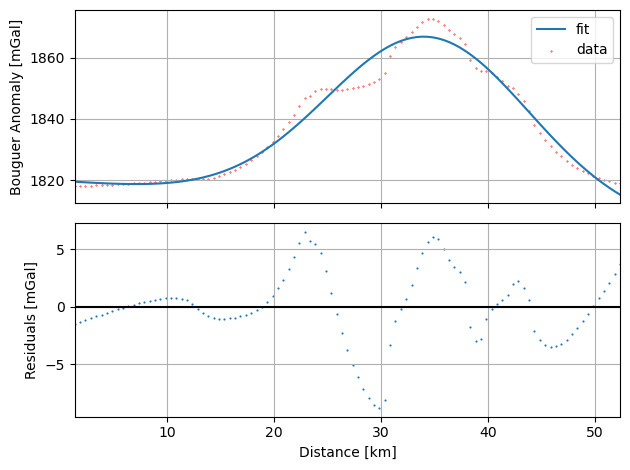

In [15]:
fig = find_FWHM(x,anomaly,1.83e3,0,10e3,35e3,55,False)
fig.show()

This shows the half width of the gravity anomaly is $2.32 \times 10^4 \pm 752 \mathrm{m}$.

## Half Width of Magnetic Model 1

In [27]:
x,anomaly = np.loadtxt('Modelling/Gravity/Mag_Model1.txt',unpack=True,usecols=[0,1])

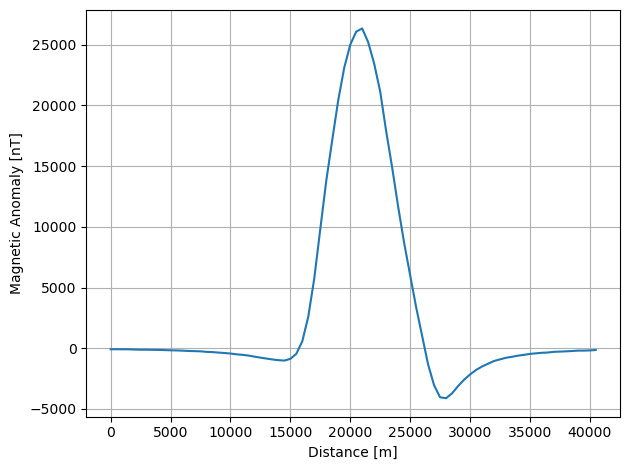

In [28]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Magnetic Anomaly [nT]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $0 \mathrm{nT}$
- gradient of the background: $0 \mathrm{nT}$
- Half width: $3.3 \times 10^{3} \mathrm{m}$
- Centre of the peak: $20 \times 10^{3} \mathrm{m}$
- Height of the peak: $2.5 \times 10^4 \mathrm{nT}$

FWHM = 5203.151162698888 +/- 65.90803873019105
SSR = 41846379.206385516  n_df =  77  R^2 =  0.9933098485128714


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_50784/417083868.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


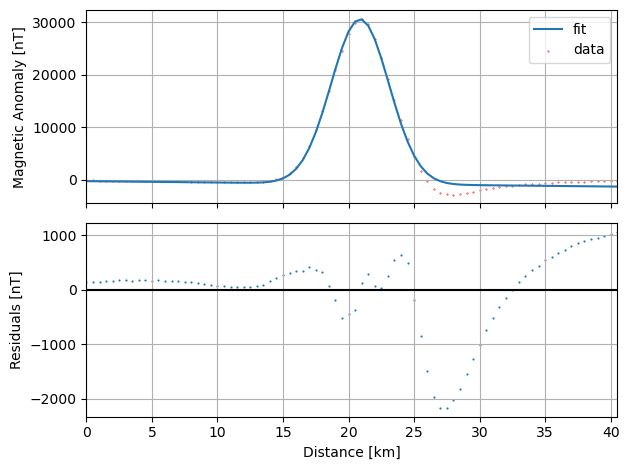

In [36]:
fig = find_FWHM(x,anomaly,0,0,3.3e3,20e3,2.5e4)
fig.show()

This shows the half width of the aeromagnetic anomaly is $5.5 \times 10^3 \pm 113 \mathrm{m}$.

## Half Width of Magnetic Model 2

In [37]:
x,anomaly = np.loadtxt('Modelling/Gravity/Mag_Model2.txt',unpack=True,usecols=[0,1])

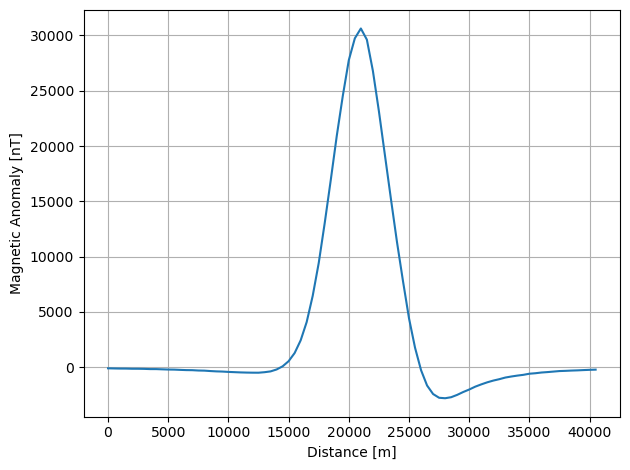

In [38]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Magnetic Anomaly [nT]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $0 \mathrm{nT}$
- gradient of the background: $0 \mathrm{nT}$
- Half width: $3.3 \times 10^{3} \mathrm{m}$
- Centre of the peak: $20 \times 10^{3} \mathrm{m}$
- Height of the peak: $3 \times 10^4 \mathrm{nT}$

FWHM = 5203.153608020054 +/- 65.90777874237556
SSR = 41846379.203528136  n_df =  77  R^2 =  0.9933098485133283


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_50784/961104070.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


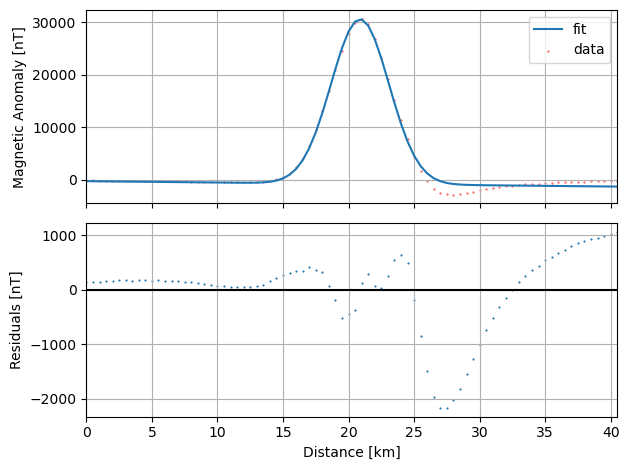

In [39]:
fig = find_FWHM(x,anomaly,0,0,3.3e3,20e3,3e4)
fig.show()

This shows the half width of the aeromagnetic anomaly is $5.21 \times 10^3 \pm 66 \mathrm{m}$.

## Half Width of Magnetic Model 3

In [40]:
x,anomaly = np.loadtxt('Modelling/Gravity/Mag_Model3.txt',unpack=True,usecols=[0,1])

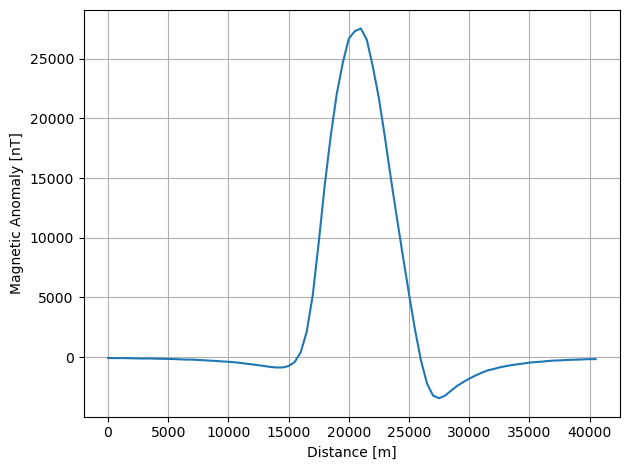

In [41]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Magnetic Anomaly [nT]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $0 \mathrm{nT}$
- gradient of the background: $0 \mathrm{nT}$
- Half width: $3.3 \times 10^{3} \mathrm{m}$
- Centre of the peak: $20 \times 10^{3} \mathrm{m}$
- Height of the peak: $2.75 \times 10^4 \mathrm{nT}$

FWHM = 5345.688866603073 +/- 101.03818292895349
SSR = 85197848.3933684  n_df =  77  R^2 =  0.9851968729797701


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_50784/1077415058.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


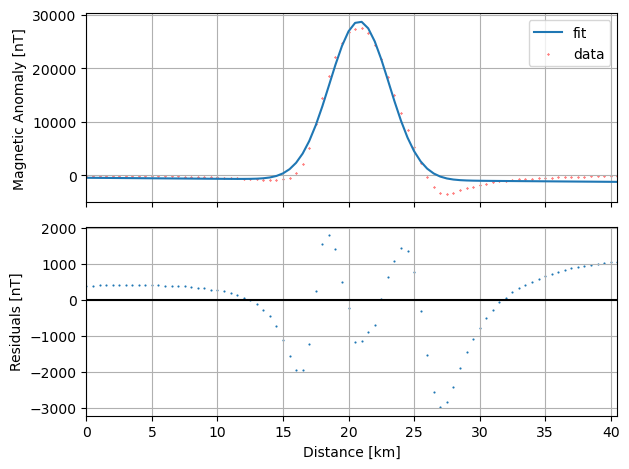

In [42]:
fig = find_FWHM(x,anomaly,0,0,3.3e3,20e3,2.75e4)
fig.show()

This shows the half width of the aeromagnetic anomaly is $5.34 \times 10^3 \pm 100 \mathrm{m}$.

## Half Width of Combined Magnetic Model

In [12]:
x,anomaly = np.loadtxt('Modelling/Gravity/Mag_ModelC.txt',unpack=True,usecols=[0,1])

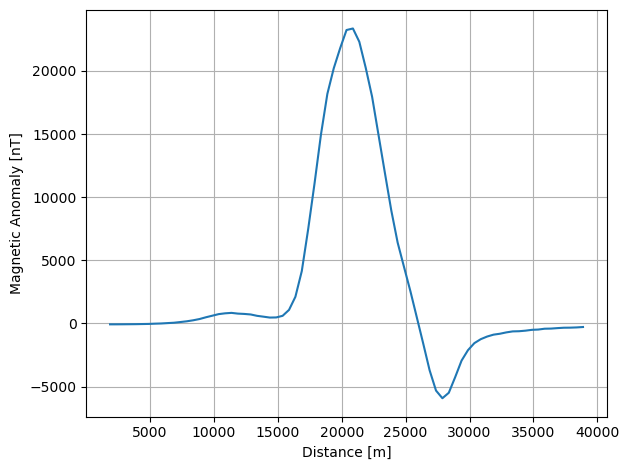

In [13]:
plt.plot(x,anomaly)
plt.xlabel('Distance [m]')
plt.ylabel('Magnetic Anomaly [nT]')
plt.tight_layout()
plt.grid(True,'both')
plt.show()

Assuming:
- y intercept of the background: $0 \mathrm{nT}$
- gradient of the background: $0 \mathrm{nT}$
- Half width: $3.3 \times 10^{3} \mathrm{m}$
- Centre of the peak: $20 \times 10^{3} \mathrm{m}$
- Height of the peak: $3 \times 10^4 \mathrm{nT}$

FWHM = 5301.554687128791 +/- 156.63488831580426
SSR = 128048381.66330782  n_df =  70  R^2 =  0.9676463593308022


/var/folders/8v/mbt7tvjn7wgf9c1zyghww_3c0000gn/T/ipykernel_80823/961104070.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


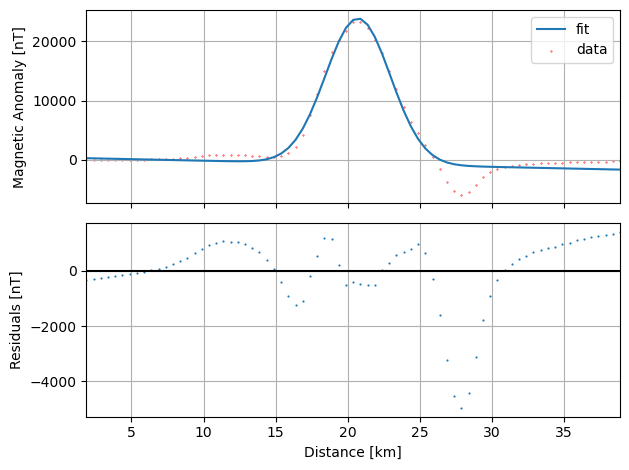

In [14]:
fig = find_FWHM(x,anomaly,0,0,3.3e3,20e3,3e4)
fig.show()

This shows the half width of the aeromagnetic anomaly is $5.30 \times 10^3 \pm 157 \mathrm{m}$.